<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/4_ML_PULSAR_STAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pulsar-star-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2556584%2F4342587%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T110123Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0f75d305b8f960a6ea4bae92419ecd2e2390c069dfab15e4ad58dd2bda874f5d79dd183d4f9673238ec6d10cf67c053cb456a816e0a905a32df5817a34ea57e090d9566f1baafa2e07a35f3ec73c1584d432f2c54a397f280a4030b86dc38013451566dcb6ebf7a99f8b535d98a66326b5db48882037d37dc0cdbfb7cab6e756be130c063bc2f2b3c6e90b2e7db159e5fdcf62a69c8ef968753622604a7026556e5efdd0b5f564cab50f4e780280449c37d0e7d74dd1b229713bba91f0d64c1f0db69fb210f0999b353ad4206c3539db1f9cc2874e3046755157be73139a51e72e2b31b86de2c33b01e13fa91db9ddef0bf871d565008c7da6f362fa1be81fe6,pulsar-train-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2556609%2F4342644%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T110123Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D35df65adc67a66fcf706ffa579be3ff7c981ec8c034b839100883e0eb988e175baa472eea14f1ab772e428161df23e88d9e6a416c3d75e12da5b90b52ca025b1758909b485f881532d3bcdf4d91dbb29cdc16fb1376c87d925490637c13317997577e0331d3e2d68c638840cee74e6bce2e9edcf287b5e697065d92020a8758d1c44903d343affa8c6074b121f4e90a806737b612823097b3cc2ff427978e8aafa923f4516bf948298c0dbe2417b387f28e4bbd9898b004c645b6ed8638d90fb53896d956c28bba8b4505af1a00b1883b86cbc19b8be52db3d9bf897f2141f1c2f7795d002add4ec4f905aecf6f6183b58b8762b29547c3a1a3c5eb75ad3e45d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


This is Haneen Hossam and abdullah

### Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

DM-SNR - Dispersion Measure of the Signal to Noise Ratio

Integrated profile - Folding signals w.r.t rotational period

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary
* 17,898 total examples.
* 1,639 positive examples.
* 16,259 negative examples.


#### *Downloading* data and setup


# Data loading and viewing

In [ ]:
import pandas as pd # library for data manipulation
import numpy as np # library for array management
import seaborn as sns # wrapper library for visualization
import matplotlib.pyplot as plt # library for data visualization
%matplotlib inline

train = pd.read_csv('../input/pulsar-train-dataset/pulsar_data_train.csv') # read the data into a dataframe
train.head(10) # check the top 10 rows of the dataframe

np.random.seed(123)

In [ ]:
train.tail(10) # check the bottom 10 rows of the data frame

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12518,100.656250,42.408438,0.396806,0.472521,23.314381,52.123645,2.154456,3.743475,0.0
12519,124.742188,51.234791,-0.085093,-0.422925,2.815217,14.863936,8.231859,94.205382,0.0
12520,115.375000,52.625891,0.448982,0.104404,3.354515,18.365749,7.358722,65.764006,0.0
12521,90.570312,54.453203,1.238812,0.880610,152.419732,73.971777,-0.933088,-0.371532,1.0
12522,124.828125,50.586731,0.233563,-0.286908,2.342809,13.949966,9.226188,117.308146,0.0
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0
12527,120.726562,50.472256,0.346178,0.184797,0.769231,11.792603,17.662222,329.548016,0.0


We can see that multiple NaN values exist in 'Standard deviation of the DM-SNR curve' (missing values)

In [ ]:
  # Describe method applied across columns to give the following
  # (1) Numerical Summary Statistics for Numerical Variables : Central Tendency and Spread
  # (2) Count Summary Statistics for Categorical Variables : Count , Most Common category , Frequency of Most Common Category
  train.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### Integrated Profile
This curve seems to be a normal distribution. which is symmetric about the mean and regular thickness of tails

#### 1. Mean
Since mean is close to 50% mark and 25% and 75% are within 1 std. dev. from the mean. Large difference between min and max, hence larger std. dev. Hence the mean of the integrated profile seems volatile with a large standard deviation.

#### 2. Std. Dev
Since mean is close to 50% mark and 25% and 75% are within less than 1 std. dev. from the mean, this data is normally distributed. The max and min values are 3-4 standard deviations from the mean.

#### 3. Excess Kurtosis (Missing Values)
Majority of this data (atleast 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. This means the integrated profile's tails are generally the same size as normal distributions.

#### 4. Skewness
Majority of this data (definitely more 75%) is less than mean. Hence a large head portion in this distribution. Hence the distribution of the left of mean is more tightly spread than the right. Hence the integrated profile must not be very skewed.

### DM-SNR Curve

This curve is expected to be more highly spread than a normal distribution, and skewed towards the right of the mean.

#### 1. Mean
Standard deviation of the mean is very high, with more than 75% values being less than mean. Hence mean of most curves are small

#### 2. Std. Dev (Missing Values)
Very skewed towards the higher side. Can expect most values to have standard deviation lower than 28. However, comparing this with the distribution of DM-SNR curve, which is mostly less than 5. This is a very highly spread DM-SNR curve.

#### 3. Excess Kurtosis
This is normally distributed since mean = 50% value and every 25% is approx one std. dev. However, these values are high, hence the DM-SNR curve has fatter tails than normal distribution.

#### 4. Skewness (Missing Values)
Very high values, and high standard deviation. Hence the DM-SNR curve is very skewed (expected)

In [ ]:
# Assessing the data types for each variable / column
train.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

All continuous values

## NULL Detection

<AxesSubplot:>

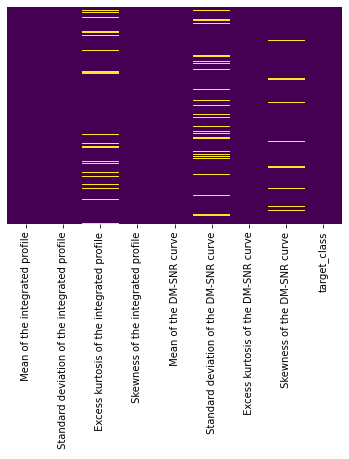

In [ ]:
# Visualizing the extent of missing values in each variable
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
# Numerical Profiling of Missing enrtries in each variable
for feature in train.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(train[train[feature].isnull() == True])))

Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 1735
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 1178
Missing values in feature  Excess kurtosis of the DM-SNR curve : 0
Missing values in feature  Skewness of the DM-SNR curve : 625
Missing values in feature target_class : 0


3 columns have null values (Roughly 5% or 10%)

In [ ]:
# Another method for Numerical profiling of Missing entries in each variable
train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

# Feature analysis

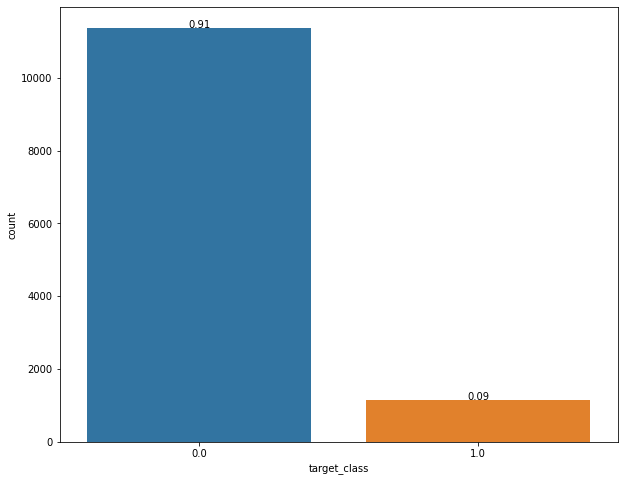

In [ ]:
# Visualizing the distribution of Target Class
plt.figure(figsize = (10, 8))
total = float(len(train))
ax = sns.countplot(x = 'target_class', data = train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center")

Class imbalance (10:1 almost)

In [ ]:
print('No. of instances pulsar stars are detected in dataset is ' + str(len(train[train['target_class'] == 1])))
print('No. of instances pulsar stars are not detected in dataset is ' + str(len(train[train['target_class'] == 0])))

No. of instances pulsar stars are detected in dataset is 1153
No. of instances pulsar stars are not detected in dataset is 11375


In [ ]:
# Since all dtypes are float or int, no categorical features
continous_features = list(set(train.columns) - set(['target_class']))
continous_features.sort()
continous_features

[' Excess kurtosis of the DM-SNR curve',
 ' Excess kurtosis of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Mean of the integrated profile',
 ' Skewness of the DM-SNR curve',
 ' Skewness of the integrated profile',
 ' Standard deviation of the DM-SNR curve',
 ' Standard deviation of the integrated profile']

### Histogram Plots

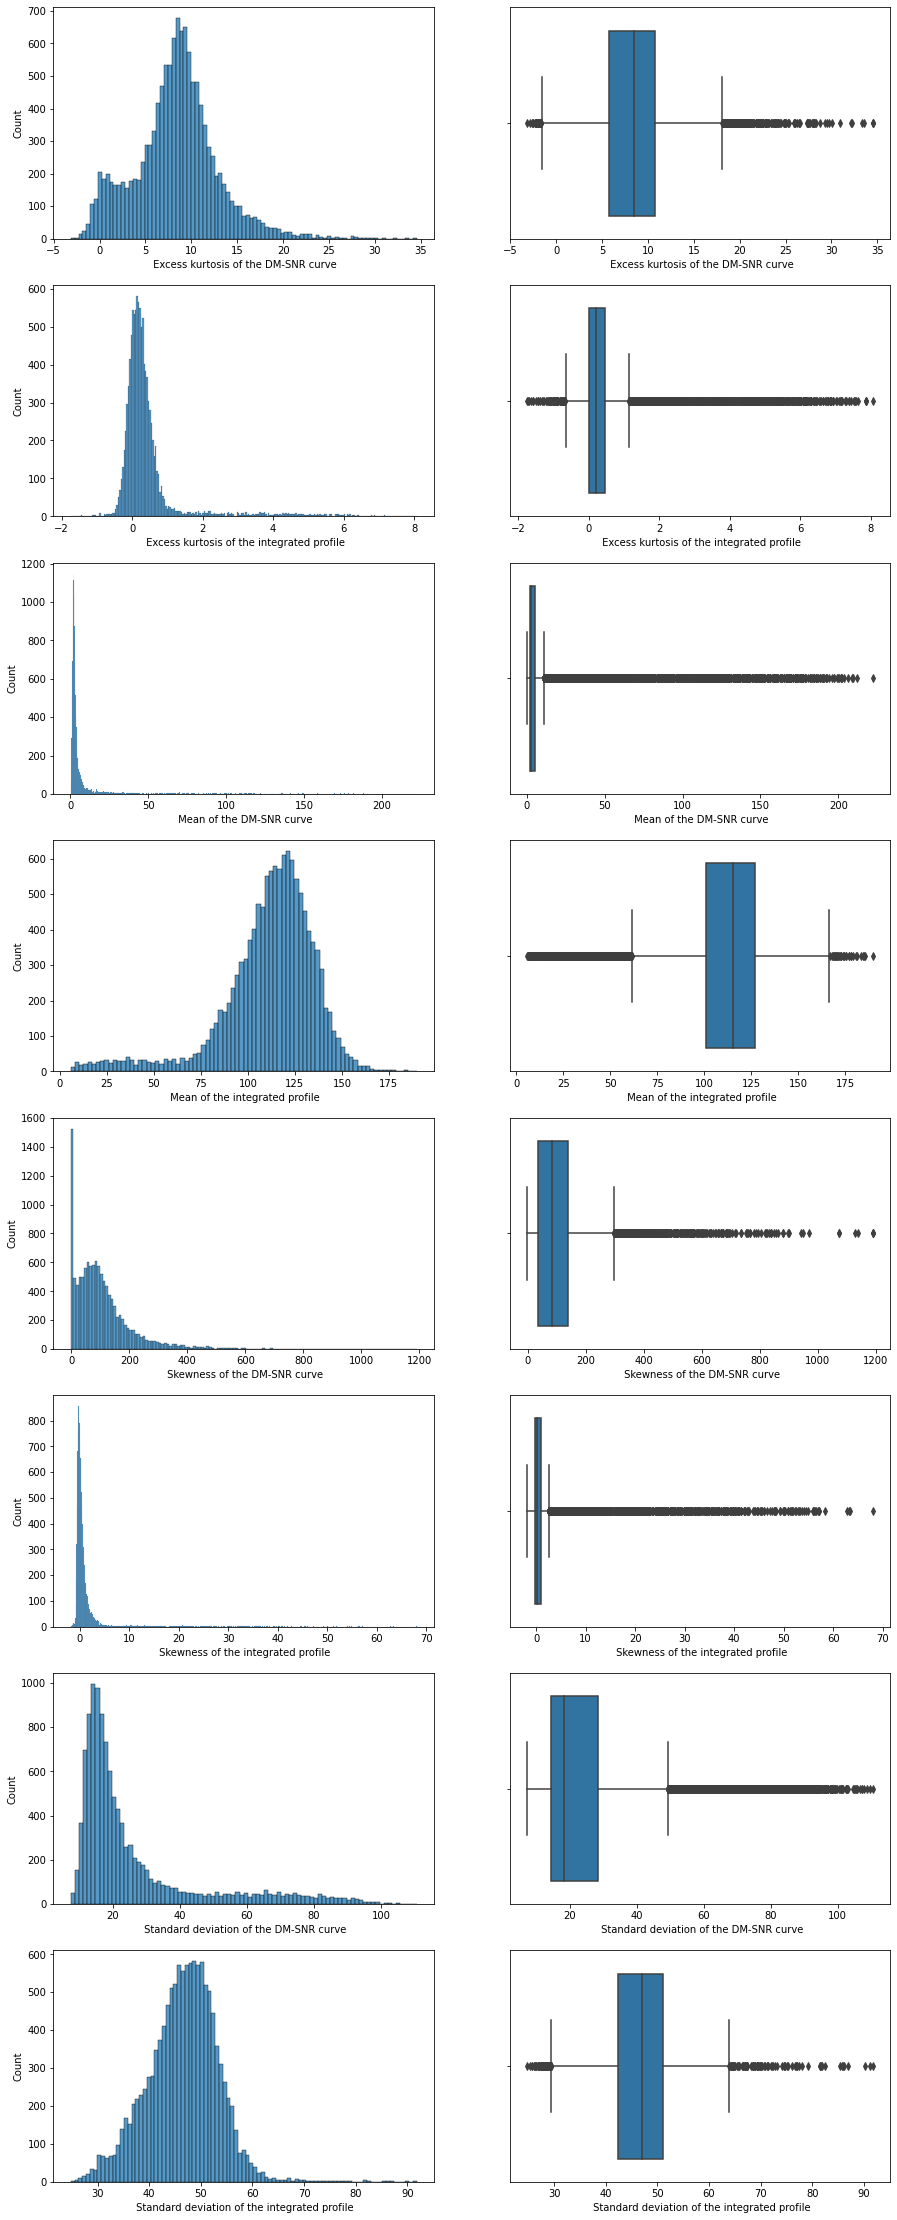

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 40))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=train.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.boxplot(x=data[feature].dropna(), ax=axes[i][1])

### Integrated Profile

We can expect a mean around 50 with a high standard deviation almost comparable to the mean. Not very skewed (slightly towards the right) and slightly fat tails.

**Mean** Very few outliers, amost a normal distribution except for a large left tail

**Std. Dev** Almost no outliers, a normal distribution with a tail to right of mean

**Excess Kurtosis** Highly crowded, few outliers in the form of a long tail to the right

**Skewness** Highly crowded, few outliers in the form of a long tail to the right


### DM-SNR Curve

We can expect a mean around 50 with a high standard deviation almost comparable to the mean. Not very skewed (slightly towards the right) and slightly fat tails.

**Mean** Highly crowded, skewed towards the right, with a long tail.

**Std. Dev** Right skewed, with a fat right tail.

**Excess Kurtosis** Left skewed normal distribution. Minimal tails.

**Skewness** Highly right skewed with a long right tail

### Target class based distributions

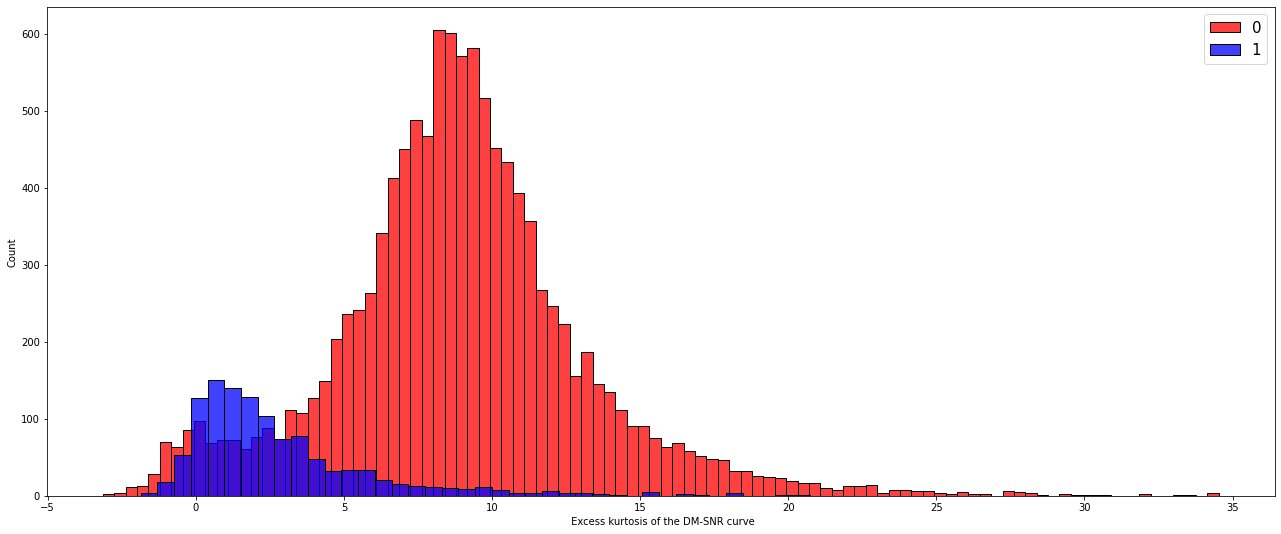

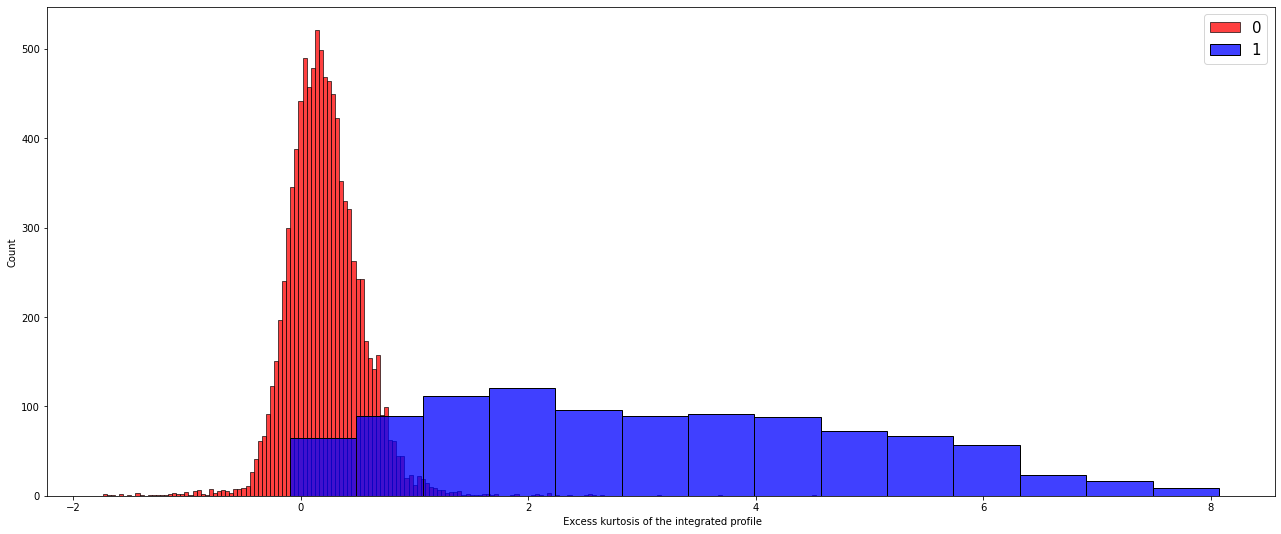

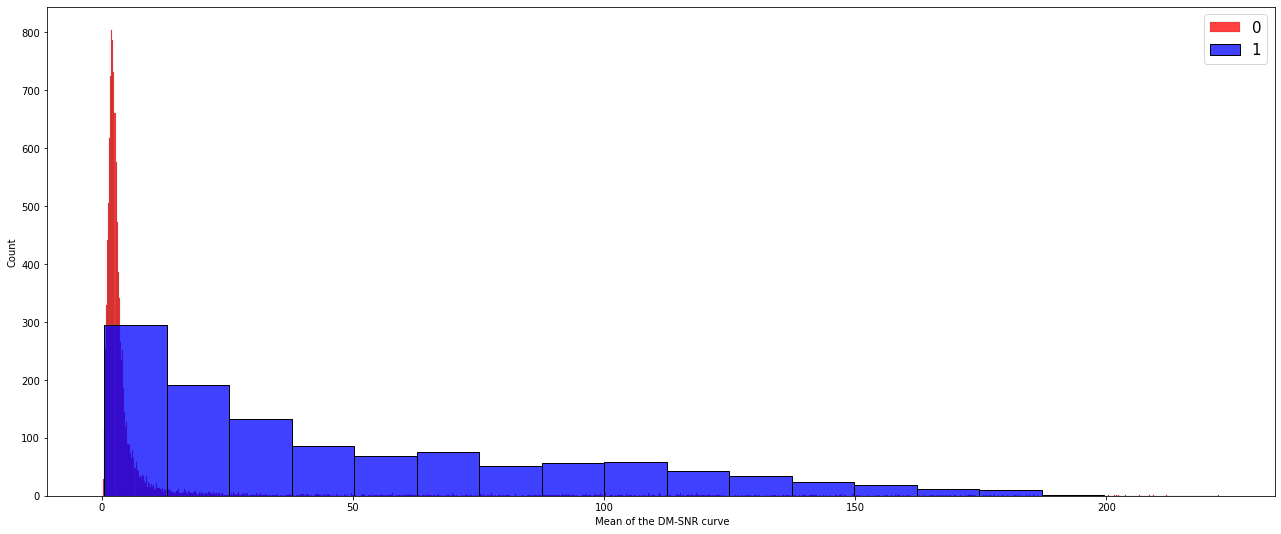

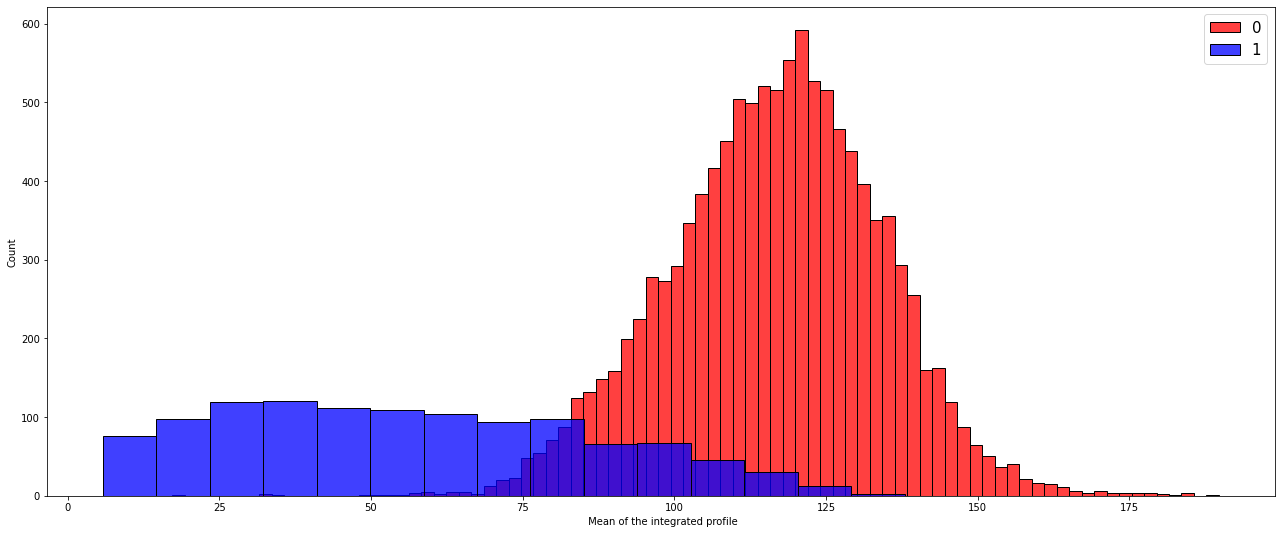

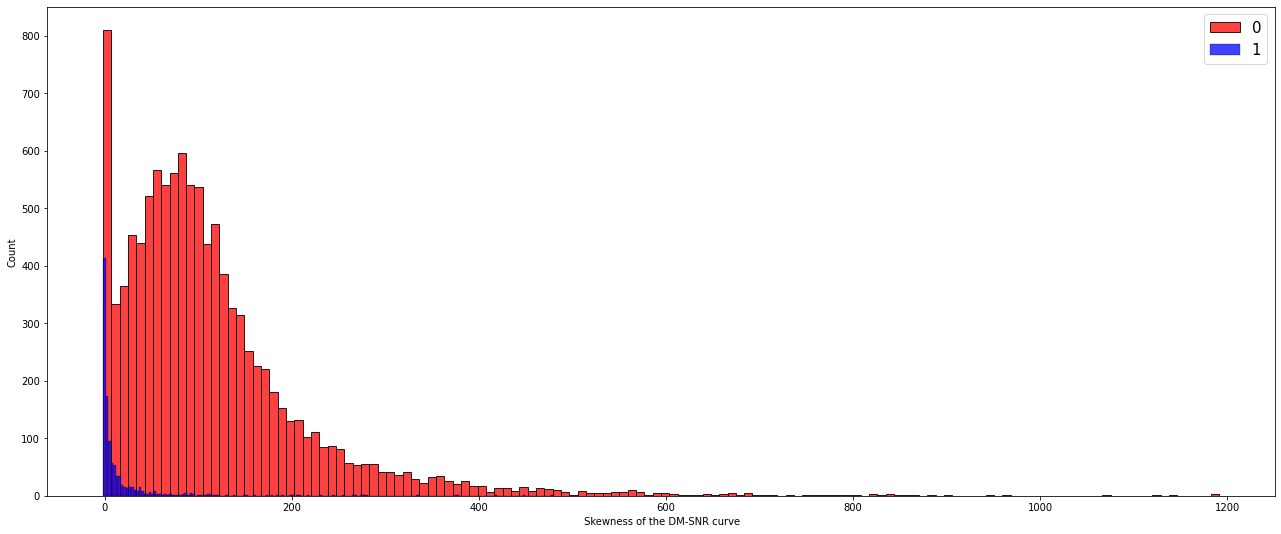

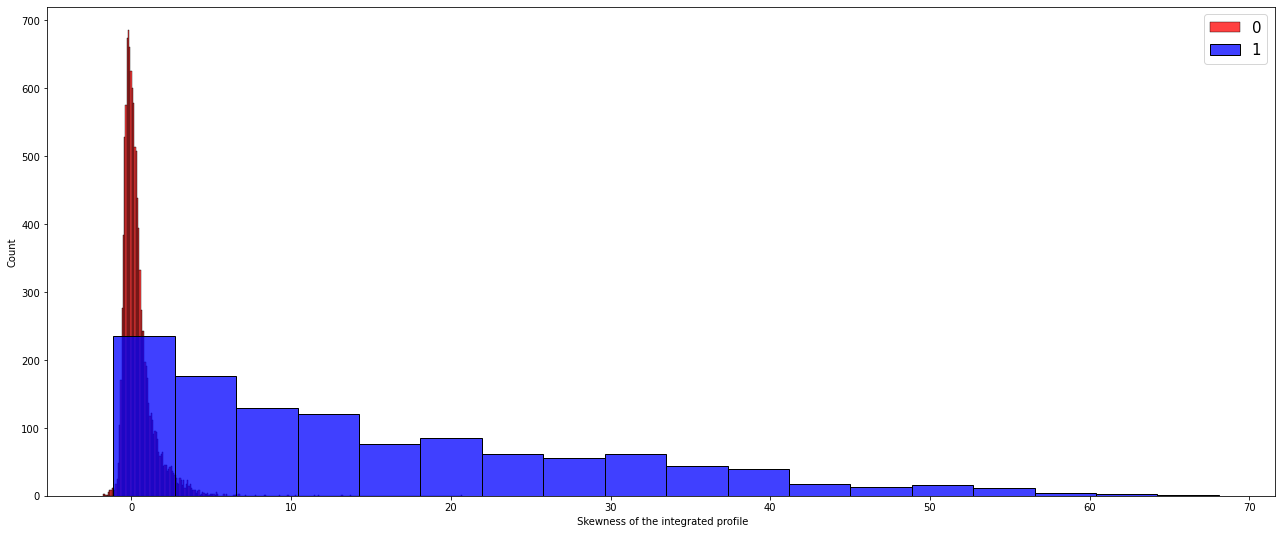

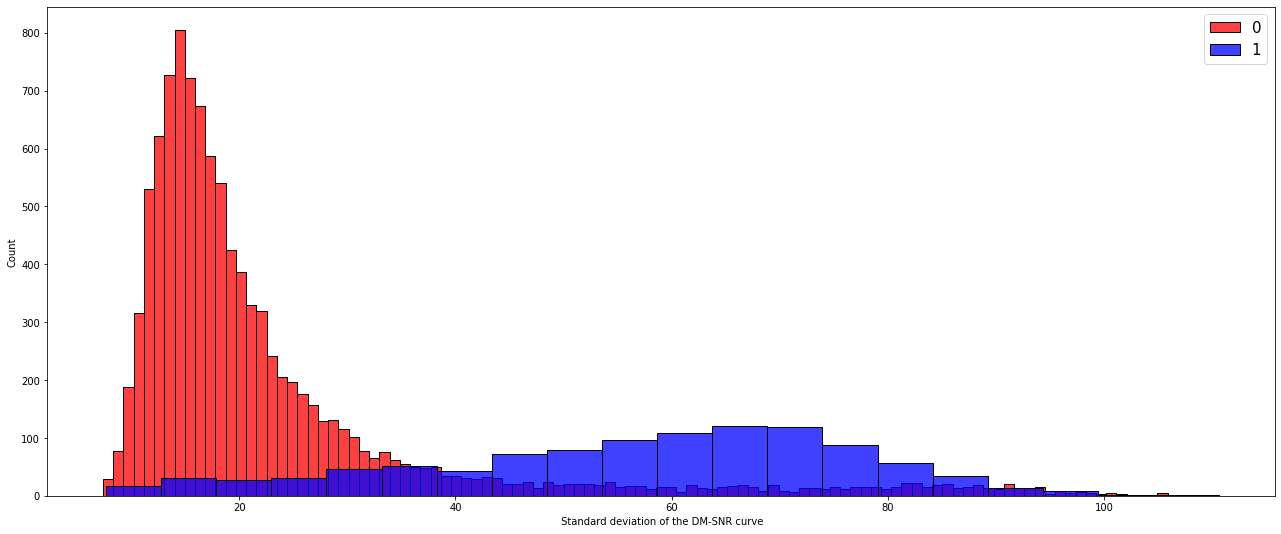

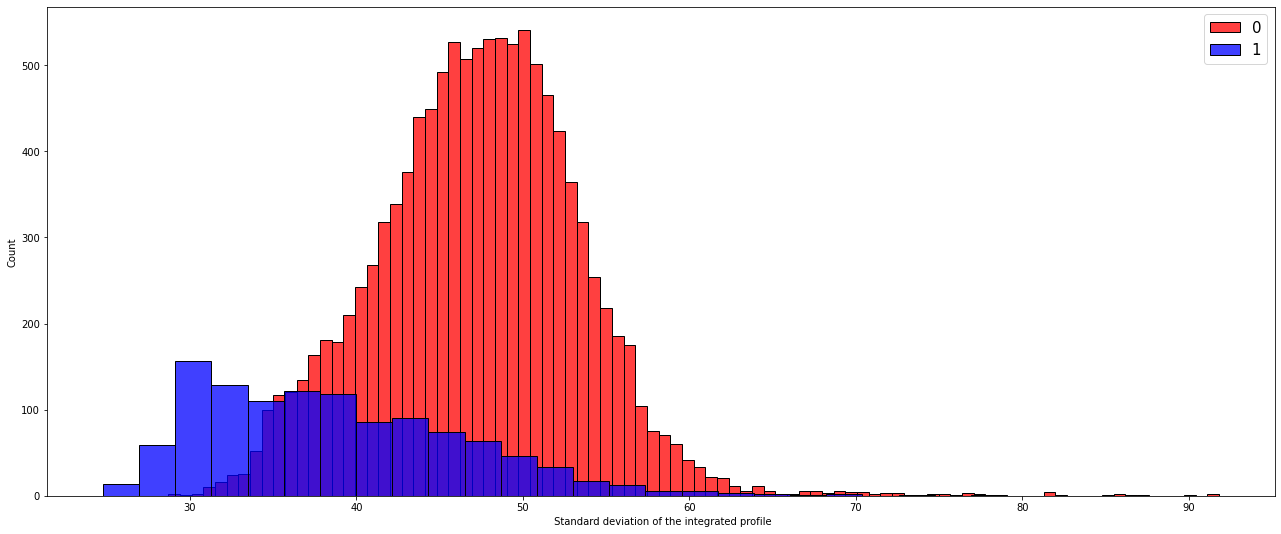

In [ ]:
# from matplotlib.ticker import FormatStrFormatter

train_dummy = train.copy()
for feature in continous_features:
  fig, axs = plt.subplots(figsize=(22, 9))
  sns.histplot(train_dummy[train_dummy['target_class']==0][feature].dropna(), color='red')
  sns.histplot(train_dummy[train_dummy['target_class']==1][feature].dropna(), color='blue')

  plt.legend([0, 1], loc='upper right', prop={'size': 15})
  plt.show()

We see that most features come from independent distributions, however have significant overlap.

### Outlier detection

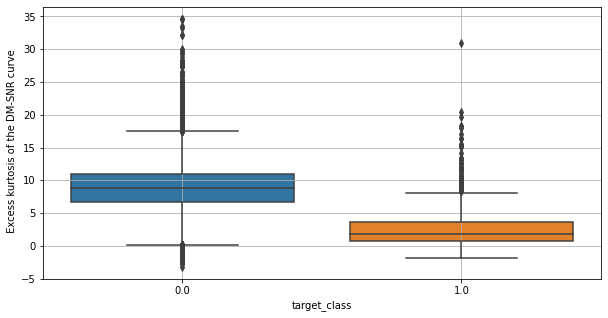

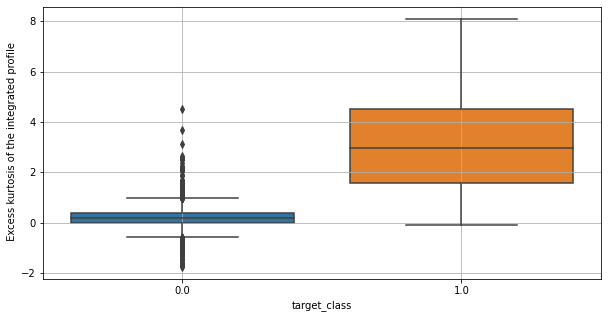

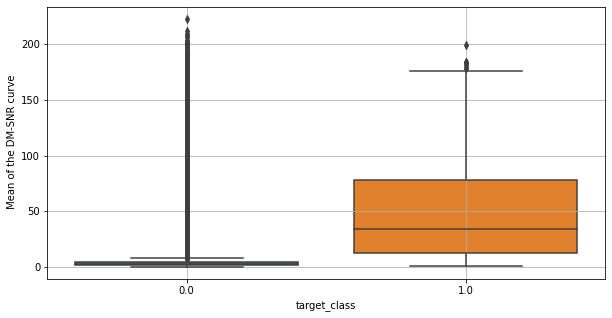

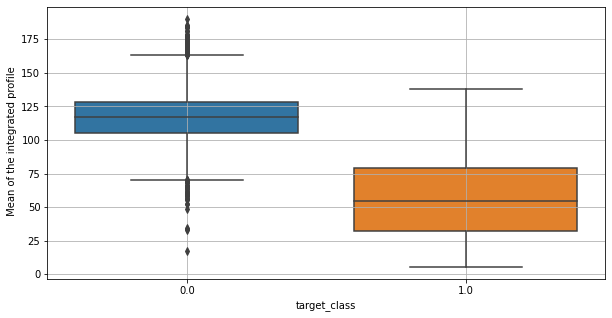

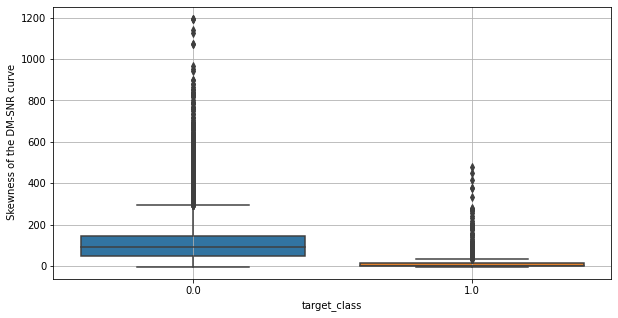

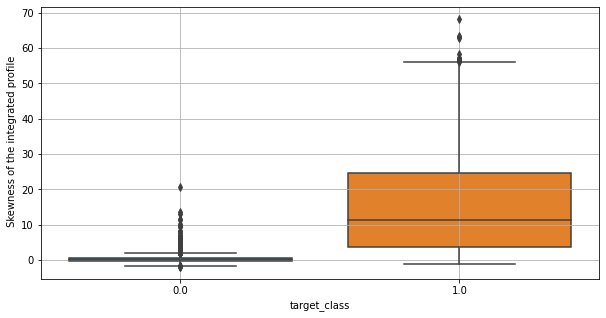

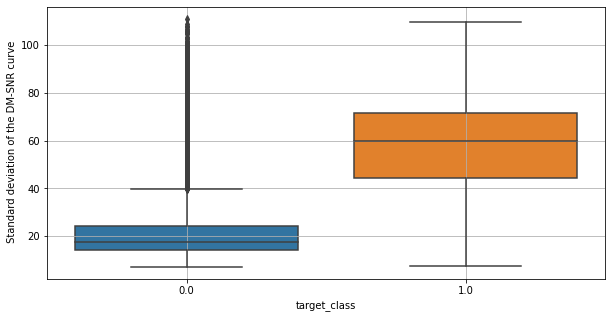

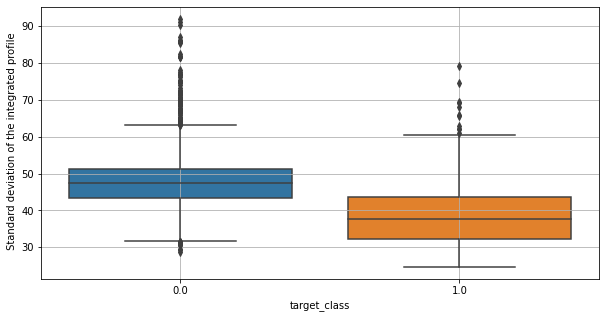

In [ ]:
 # from matplotlib.ticker import FormatStrFormatter
for i in range(len(continous_features)):
  feature = continous_features[i]
  plt.figure(figsize = (10, 5))
  sns.boxplot(x = 'target_class', y = continous_features[i], data = train)
  plt.grid()
  plt.show()

### Integrated Profile
**Mean** Non pulsars have a higher mean, as well as more outliers.
**Std. Dev** Non pulsars have a higher deviation as well, with a longer outlier tail
**Excess Kurtosis** Non pulsars have a lower value, as smaller distribution
**Skewness** Non pulsars have a smaller, less deviated value (almost 0)

### DM-SNR Curve
**Mean** Non pulsars have a much lower mean, as well as fewer outler.
**Std. Dev** Non pulsars have a lower deviation, with a longer outlier tail
**Excess Kurtosis** Non pulsars have a higher value, and similar distributions
**Skewness** Non pulsars a larger spread of skewness, as well as a larger value

## Correlation Heatmap

<AxesSubplot:>

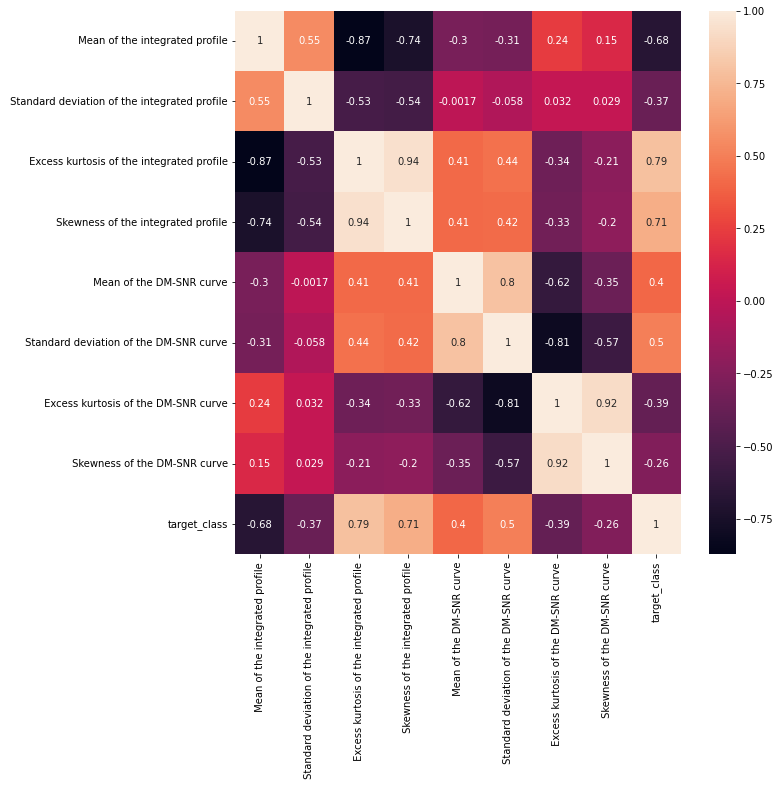

In [ ]:
plt.figure(figsize = (10, 10))
corr_mat = train.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

### Correlations between 2 dependent variables

**Highly positively correlated:**
1. Skewness of the integrated profile and Excess kurtosis of the DM-SNR curve
2. Skewness of the DM-SNR curve and Excess kurtosis of the DM-SNR curve
3. Mean the DM-SNR curve and Standard Deviation of the DM-SNR curve

**Highly negatively correlated:**
1. Mean of the integrated profile and Excess kurtosis of the integrated profile
2. Mean of the integrated profile and Skewness of the integrated profile
3. Excess kurtosis the DM-SNR curve and Standard Deviation of the DM-SNR curve

### Correlations between independent and dependent variable

**Highly positively correlated:**
1. Excess kurtosis of the integrated profile
2. Skewness of the integrated profile

**Highly negatively correlated:**
1. Mean of the integrated profile

# Missing Data Calculation

In [ ]:
# Numerical Profiling of Missing enrtries in each variable
for feature in train.columns:
    print('Missing values in feature ' + str(feature) + ' : ' + str(len(train[train[feature].isnull() == True])))

Missing values in feature  Mean of the integrated profile : 0
Missing values in feature  Standard deviation of the integrated profile : 0
Missing values in feature  Excess kurtosis of the integrated profile : 1735
Missing values in feature  Skewness of the integrated profile : 0
Missing values in feature  Mean of the DM-SNR curve : 0
Missing values in feature  Standard deviation of the DM-SNR curve : 1178
Missing values in feature  Excess kurtosis of the DM-SNR curve : 0
Missing values in feature  Skewness of the DM-SNR curve : 625
Missing values in feature target_class : 0


In [ ]:
train.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [ ]:
train.isnull().sum()/len(train) * 100

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.848978
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.402937
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.988825
target_class                                      0.000000
dtype: float64

In [ ]:
!pip install scikit-learn

In [ ]:
null_data = train[train.isnull().any(axis=1)]

In [ ]:
null_data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0
13,128.734375,48.695560,NaN,0.307803,5.307692,25.162295,5.497544,32.739833,0.0


In [ ]:
null_data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
12503,132.335938,52.273362,-0.095982,-0.417207,4.736622,NaN,6.188823,38.899944,0.0
12504,85.015625,36.717244,NaN,2.503142,3.262542,21.981437,7.249661,54.863037,0.0
12506,113.750000,51.916098,0.215305,-0.216608,1.678930,11.105255,13.117945,NaN,0.0
12513,127.609375,53.509379,NaN,-0.564330,0.527592,8.985407,22.332707,571.169156,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0


In [ ]:
null_data.isnull().sum()/len(train) * 100

 Mean of the integrated profile                   0.000000
 Standard deviation of the integrated profile     0.000000
 Excess kurtosis of the integrated profile       13.848978
 Skewness of the integrated profile               0.000000
 Mean of the DM-SNR curve                         0.000000
 Standard deviation of the DM-SNR curve           9.402937
 Excess kurtosis of the DM-SNR curve              0.000000
 Skewness of the DM-SNR curve                     4.988825
target_class                                      0.000000
dtype: float64

In [ ]:
len(null_data)

3255

Null in 2 columns

In [ ]:
train_temp = train[train[' Excess kurtosis of the integrated profile'].isnull() &
      train[' Standard deviation of the DM-SNR curve'].isnull()]
train_temp.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
193,107.328125,50.279082,NaN,-0.224435,4.903846,NaN,5.887304,37.755694,0.0
216,127.820312,45.155536,NaN,0.136251,2.607023,NaN,9.235036,90.246982,0.0
235,101.656250,40.061366,NaN,0.777563,3.377926,NaN,7.086231,54.225258,0.0
299,148.164062,50.124030,NaN,0.141802,4.107860,NaN,7.891065,71.480513,0.0
316,84.250000,37.884693,NaN,2.217338,1.829431,NaN,10.895148,158.267737,0.0


In [ ]:
print(len(train_temp))

140


In [ ]:
train_temp = train[train[' Excess kurtosis of the integrated profile'].isnull() &
                   train[' Skewness of the DM-SNR curve'].isnull()]
train_temp.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
84,98.562500,40.053236,NaN,1.437456,3.413880,21.925118,7.736376,NaN,0.0
314,106.914062,44.026098,NaN,0.255207,3.627090,22.270639,7.163068,NaN,0.0
718,118.265625,47.003239,NaN,-0.187586,1.852007,NaN,10.720854,NaN,0.0
948,103.726562,41.526482,NaN,0.751884,2.852007,20.328794,7.883246,NaN,0.0
1061,89.968750,36.739994,NaN,2.224201,2.116221,17.037261,9.801239,NaN,0.0


In [ ]:
print(len(train_temp))

91


In [ ]:
train_temp = train[train[' Skewness of the DM-SNR curve'].isnull() &
      train[' Standard deviation of the DM-SNR curve'].isnull()]
train_temp.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
240,138.367188,53.725557,-0.111209,-0.402939,1.902174,NaN,11.505464,NaN,0.0
304,58.218750,34.929826,2.982097,11.696463,19.099498,NaN,2.906034,NaN,1.0
405,102.578125,54.297446,0.482946,0.050885,136.550167,NaN,-0.935903,NaN,0.0
718,118.265625,47.003239,NaN,-0.187586,1.852007,NaN,10.720854,NaN,0.0
854,118.679688,45.421452,0.136267,0.114443,2.412207,NaN,8.978144,NaN,0.0


In [ ]:
len(train_temp)

57

In [ ]:
train_temp = train[train[' Excess kurtosis of the integrated profile'].isnull() &
      train[' Standard deviation of the DM-SNR curve'].isnull() &
      train[' Skewness of the DM-SNR curve'].isnull()]
train_temp.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
718,118.265625,47.003239,NaN,-0.187586,1.852007,NaN,10.720854,NaN,0.0
1832,55.500000,33.190972,NaN,13.091231,30.227425,NaN,2.201155,NaN,1.0
3542,144.835938,46.418911,NaN,0.132391,1.504181,NaN,11.910922,NaN,0.0
5450,89.921875,43.141412,NaN,1.598538,1.429766,NaN,12.625561,NaN,1.0
7634,119.335938,47.506953,NaN,0.645718,0.792642,NaN,18.766540,NaN,0.0


In [ ]:
len(train_temp)

5

So, we can see
Col1: Excess kurtosis of the integrated profile

Col2: Standard deviation of the DM-SNR curve

Col3: Skewness of the DM-SNR curve

Among the 3255 rows with null vaues,
1. 140 rows have Col1 and Col2 as NaN
2. 91 rows have Col1 and Col3 as NaN
3. 57 rows have Col2 and Col3 as NaN
4. 5 rows have Col1, Col2 and Col3 as NaN

This means 278 rows have more than 1 value NaN

Now we impute the missing values using an iterative imputer (using all other features to find the missing values)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, LinearRegression, SGDRegressor, ARDRegression

In [ ]:
null_data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,NaN,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,NaN,-0.700809,-1.200653,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,NaN,5.702532,36.342493,0.0
13,128.734375,48.695560,NaN,0.307803,5.307692,25.162295,5.497544,32.739833,0.0
...,...,...,...,...,...,...,...,...,...
12503,132.335938,52.273362,-0.095982,-0.417207,4.736622,NaN,6.188823,38.899944,0.0
12504,85.015625,36.717244,NaN,2.503142,3.262542,21.981437,7.249661,54.863037,0.0
12506,113.750000,51.916098,0.215305,-0.216608,1.678930,11.105255,13.117945,NaN,0.0
12513,127.609375,53.509379,NaN,-0.564330,0.527592,8.985407,22.332707,571.169156,0.0


So, we use bayesian ridge estimator to find the missing values from all other available attributes

In [ ]:
# ExtraTreesRegressor,BayesianRidge, LinearRegression, SGDRegressor, ARDRegression
imputer = IterativeImputer(BayesianRidge(), sample_posterior=True, max_iter=100, verbose=1)
impute_data = pd.DataFrame(imputer.fit_transform(train), columns=train.columns.values.tolist())

[IterativeImputer] Completing matrix with shape (12528, 9)


In [ ]:
train[[' Excess kurtosis of the integrated profile',
                        ' Standard deviation of the DM-SNR curve',
                        ' Skewness of the DM-SNR curve']].describe(include='all')

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
count,10793.000000,11350.000000,11903.000000
mean,0.478548,26.351318,105.525779
std,1.064708,19.610842,107.399585
min,-1.738021,7.370432,-1.976976
25%,0.024652,14.404353,35.199899
50%,0.223678,18.412402,83.126301
75%,0.473125,28.337418,139.997850
max,8.069522,110.642211,1191.000837


In [ ]:
impute_data[[' Excess kurtosis of the integrated profile',
                        ' Standard deviation of the DM-SNR curve',
                        ' Skewness of the DM-SNR curve']].describe(include='all')

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
count,12528.000000,12528.000000,12528.000000
mean,0.479465,26.324144,105.841797
std,1.065635,19.563036,107.371600
min,-1.738021,-11.766455,-49.777287
25%,0.022139,14.369531,35.232854
50%,0.224051,18.630463,83.328691
75%,0.480887,28.903833,140.862892
max,8.069522,110.782733,1191.000837


Comparing the mean and std of the train and imputed train datasets, we see they are almost the same. Moreover, our iterative imputer looks at all available features to predict the missing values

In [ ]:
impute_data.iloc[list(null_data.index)]

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,41.764106,2.958066,7.197842,0.0
5,121.007812,47.176944,0.229708,0.091336,2.036789,13.140867,9.546051,112.131721,0.0
6,79.343750,42.402174,1.063413,2.244377,141.641304,88.132682,-0.700809,-1.200653,0.0
9,109.156250,47.002234,0.394182,0.190296,4.578595,40.438942,5.702532,36.342493,0.0
13,128.734375,48.695560,-0.432038,0.307803,5.307692,25.162295,5.497544,32.739833,0.0
...,...,...,...,...,...,...,...,...,...
12503,132.335938,52.273362,-0.095982,-0.417207,4.736622,23.480504,6.188823,38.899944,0.0
12504,85.015625,36.717244,0.621744,2.503142,3.262542,21.981437,7.249661,54.863037,0.0
12506,113.750000,51.916098,0.215305,-0.216608,1.678930,11.105255,13.117945,260.506179,0.0
12513,127.609375,53.509379,0.284592,-0.564330,0.527592,8.985407,22.332707,571.169156,0.0


In [ ]:
impute_data.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

# Outlier Treatment

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((train < (lower_range)) | (train > (upper_range))).sum()

Number of Outliers (Percentage):


 Mean of the integrated profile                   717
 Standard deviation of the integrated profile     178
 Excess kurtosis of the integrated profile        973
 Skewness of the integrated profile              1340
 Mean of the DM-SNR curve                        2047
 Standard deviation of the DM-SNR curve          1506
 Excess kurtosis of the DM-SNR curve              349
 Skewness of the DM-SNR curve                     611
target_class                                     1153
dtype: int64

In [ ]:
Q1 = impute_data.quantile(0.25)
Q3 = impute_data.quantile(0.75)
IQR = Q3 - Q1
lower_range= Q1-(1.5 * IQR)
upper_range= Q3+(1.5 * IQR)
print('Number of Outliers (Percentage):')
((impute_data < (lower_range)) | (impute_data > (upper_range))).sum()/len(impute_data) * 100

Number of Outliers (Percentage):


 Mean of the integrated profile                   5.723180
 Standard deviation of the integrated profile     1.420817
 Excess kurtosis of the integrated profile        8.900064
 Skewness of the integrated profile              10.696041
 Mean of the DM-SNR curve                        16.339400
 Standard deviation of the DM-SNR curve          12.659642
 Excess kurtosis of the DM-SNR curve              2.785760
 Skewness of the DM-SNR curve                     5.052682
target_class                                      9.203384
dtype: float64

Since there are not many outliers (less than 10 percent for most columns) we can either remove them or cap them.
However, removing them is not advised, so we will cap them using IQR

In [ ]:
train_impute_out = impute_data.copy()

In [ ]:
for cols in train_impute_out.columns[:-1]:
  train_impute_out[cols] = np.where(train_impute_out[cols]>upper_range[cols],
                                    upper_range[cols],train_impute_out[cols])
  train_impute_out[cols] = np.where(train_impute_out[cols]<lower_range[cols],
                                    lower_range[cols],train_impute_out[cols])

In [ ]:
train.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,10793.000000,12528.000000,12528.000000,11350.000000,12528.000000,11903.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.351318,8.333489,105.525779,0.092034
std,25.672828,6.801077,1.064708,6.208450,29.613230,19.610842,4.535783,107.399585,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.024652,-0.188142,1.910535,14.404353,5.803063,35.199899,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.473125,0.932374,5.413253,28.337418,10.727927,139.997850,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [ ]:
cols = list(train.columns)
cols.reverse()
cols

['target_class',
 ' Skewness of the DM-SNR curve',
 ' Excess kurtosis of the DM-SNR curve',
 ' Standard deviation of the DM-SNR curve',
 ' Mean of the DM-SNR curve',
 ' Skewness of the integrated profile',
 ' Excess kurtosis of the integrated profile',
 ' Standard deviation of the integrated profile',
 ' Mean of the integrated profile']

(-200.0, 1300.0)

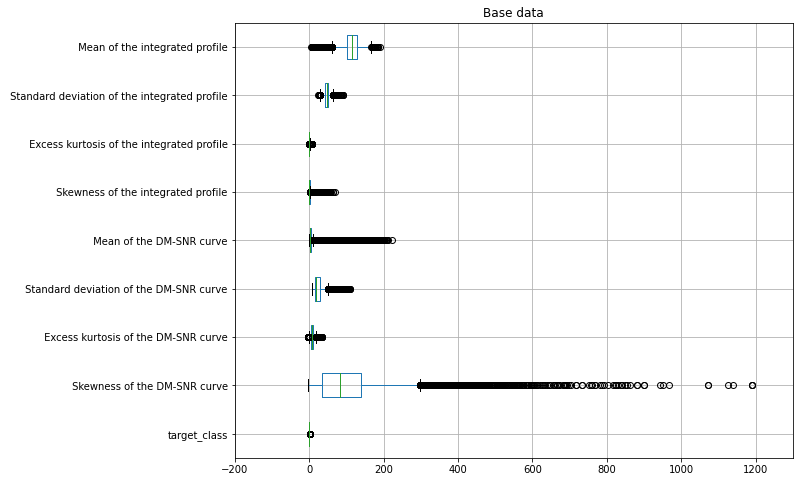

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Base data')
train.boxplot(vert=0, column=cols)
plt.xlim(-200, 1300)

In [ ]:
train_impute_out.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,112.447886,46.475793,0.289764,0.520109,4.223304,23.715381,8.248613,98.982801,0.092034
std,21.510603,6.572628,0.394720,0.983681,3.312592,13.147758,4.276166,82.213753,0.289085
min,61.513672,29.436902,-0.665984,-1.791886,0.213211,-7.431923,-1.584232,-49.777287,0.000000
25%,100.871094,42.362222,0.022139,-0.188142,1.910535,14.369531,5.803063,35.232854,0.000000
50%,115.183594,46.931022,0.224051,0.203317,2.792642,18.630463,8.451097,83.328691,0.000000
75%,127.109375,50.979103,0.480887,0.932374,5.413253,28.903833,10.727927,140.862892,0.000000
max,166.466797,63.904423,1.169011,2.613147,10.667329,50.705287,18.115223,299.307948,1.000000


(-200.0, 1300.0)

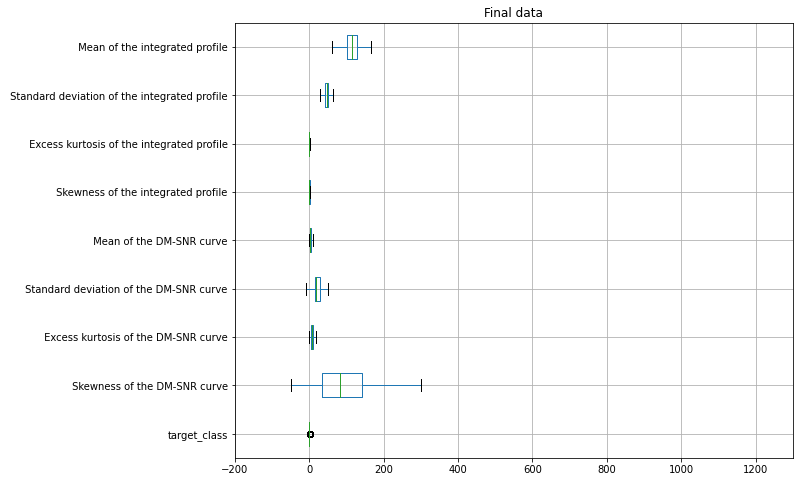

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Final data')
train_impute_out.boxplot(vert=0, column=cols)
plt.xlim(-200, 1300)

# Feature selection

Since there are only 8 features, dimensionality reduction is not nescessary

<AxesSubplot:>

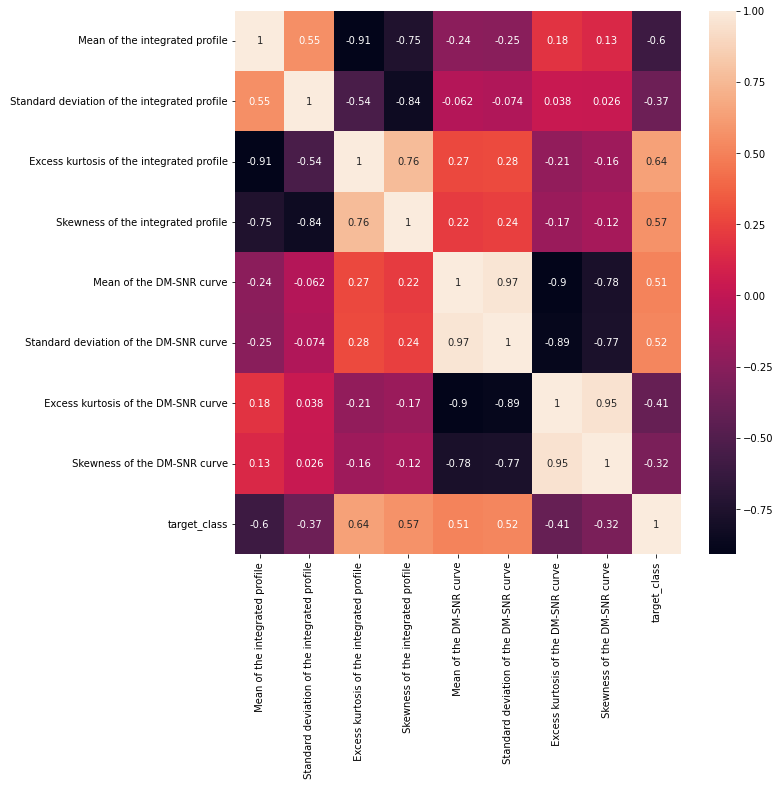

In [ ]:
 # Correlation plot after outlier treatment
plt.figure(figsize = (10, 10))
corr_mat = train_impute_out.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

We see that Excess kurtosis and Skewnesscurve are highly correlated (95 percent for DM-SNR and 76 percent for IP). Also their correlation with other features is very similar (10% difference at max) so we can drop any one of these. Also, the Mean and Standard Deviation of the DM-SNR curve is highly correlated. So we can drop any one of these as well.

However, Excess kurtosis of the integrated profile,Skewness of the DM-SNR curve and Standard Deviation of the DM-SNR curve had missing values.

Also, Skewness of the integrated profile had more outliers than Excess kurtosis of the integrated profile and Skewness of the DM-SNR curve had more missing values than Excess kurtosis of the DM-SNR curve

Therefore Skewness and Standard Deviation of the DM-SNR curve is dropped. Also Excess kurtosis of the integrated profile had almost 13% missing values (compared to 2% difference in outliers) So Excess kurtosis of the integrated profile is dropped.



In [ ]:
train_final = train_impute_out.drop([' Excess kurtosis of the integrated profile',
                                     ' Skewness of the DM-SNR curve',
                                     ' Standard deviation of the DM-SNR curve'], axis=1)

In [ ]:
train_final

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,target_class
0,121.156250,48.372971,-0.013165,3.168896,7.449874,0.0
1,76.968750,36.175557,2.613147,2.399666,9.414652,0.0
2,130.585938,53.229534,-0.297242,2.743311,8.508364,0.0
3,156.398438,48.865942,-0.171294,10.667329,2.958066,0.0
4,84.804688,36.117659,2.613147,2.790134,8.405008,0.0
...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382,0.0
12524,115.617188,46.784600,0.226757,6.140468,5.732201,0.0
12525,116.031250,43.213846,0.433088,0.785117,17.055215,0.0
12526,135.664062,49.933749,-0.226726,3.859532,7.398395,0.0


<AxesSubplot:>

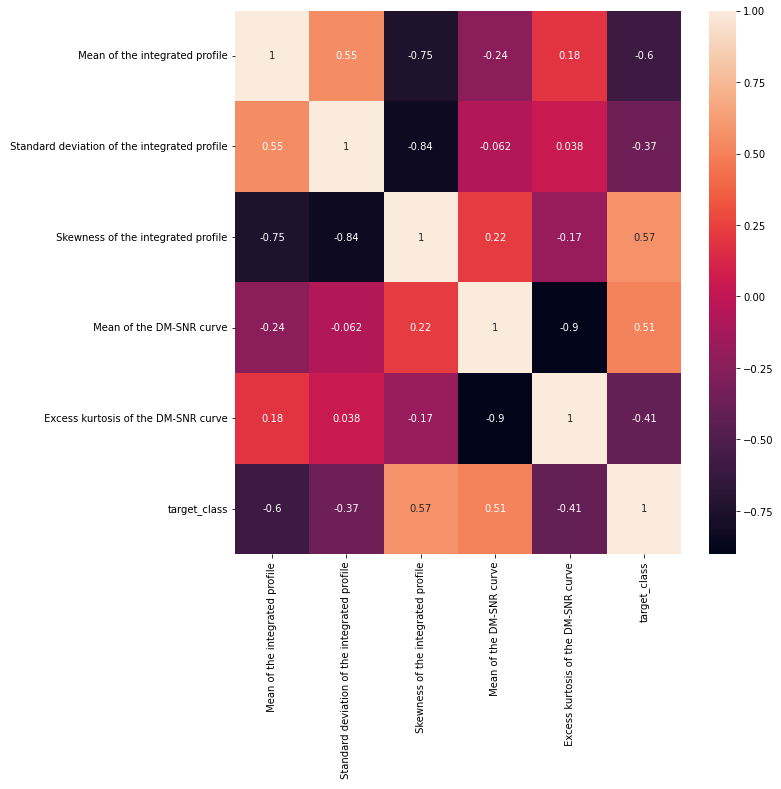

In [ ]:
 # Correlation plot after outlier treatment
plt.figure(figsize = (10, 10))
corr_mat = train_final.corr()
sns.heatmap(corr_mat, xticklabels = corr_mat.columns, yticklabels = corr_mat.columns, annot=True)

Splitting into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

y = train_final['target_class']
x = train_final.copy().drop(['target_class'], axis = 1)

In [ ]:
x

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
0,121.156250,48.372971,-0.013165,3.168896,7.449874
1,76.968750,36.175557,2.613147,2.399666,9.414652
2,130.585938,53.229534,-0.297242,2.743311,8.508364
3,156.398438,48.865942,-0.171294,10.667329,2.958066
4,84.804688,36.117659,2.613147,2.790134,8.405008
...,...,...,...,...,...
12523,124.312500,53.179053,-0.556021,7.186455,4.531382
12524,115.617188,46.784600,0.226757,6.140468,5.732201
12525,116.031250,43.213846,0.433088,0.785117,17.055215
12526,135.664062,49.933749,-0.226726,3.859532,7.398395


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12523    0.0
12524    0.0
12525    0.0
12526    0.0
12527    0.0
Name: target_class, Length: 12528, dtype: float64

In [ ]:
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.40, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.50, random_state=42)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(7516, 5)
(2506, 5)
(2506, 5)
(7516,)
(2506,)
(2506,)


In [ ]:
x.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,112.447886,46.475793,0.520109,4.223304,8.248613
std,21.510603,6.572628,0.983681,3.312592,4.276166
min,61.513672,29.436902,-1.791886,0.213211,-1.584232
25%,100.871094,42.362222,-0.188142,1.910535,5.803063
50%,115.183594,46.931022,0.203317,2.792642,8.451097
75%,127.109375,50.979103,0.932374,5.413253,10.727927
max,166.466797,63.904423,2.613147,10.667329,18.115223


In [ ]:
x_train.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000
mean,112.657892,46.480927,0.519583,4.229691,8.225526
std,21.600801,6.581426,0.990377,3.294917,4.234565
min,61.513672,29.436902,-1.668540,0.213211,-1.584232
25%,100.804688,42.322940,-0.194585,1.919523,5.803063
50%,115.339844,46.954915,0.187994,2.813545,8.415321
75%,127.460938,51.034154,0.939262,5.463002,10.680186
max,166.466797,63.904423,2.613147,10.667329,18.115223


In [ ]:
x_val.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,112.026904,46.545329,0.524507,4.157460,8.274932
std,21.377305,6.574304,0.979709,3.287725,4.287429
min,61.513672,29.436902,-1.781888,0.282609,-1.584232
25%,100.376953,42.394930,-0.184256,1.914716,5.959025
50%,114.914062,46.921742,0.230334,2.765468,8.521646
75%,126.714844,50.963922,0.944074,4.980560,10.750501
max,166.466797,63.904423,2.613147,10.667329,18.115223


In [ ]:
x_test.describe(include='all')

,Mean of the integrated profile,Standard deviation of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
count,2506.000000,2506.000000,2506.000000,2506.000000,2506.000000
mean,112.239016,46.390855,0.517287,4.269991,8.291535
std,21.372259,6.546186,0.967738,3.389673,4.388824
min,61.513672,29.436902,-1.791886,0.289298,-1.584232
25%,101.220703,42.428933,-0.174013,1.871446,5.605309
50%,114.914062,46.800235,0.233865,2.765886,8.500320
75%,126.478516,50.856244,0.891230,5.616221,10.847082
max,166.466797,63.904423,2.613147,10.667329,18.115223


In [ ]:
y.describe(include='all')

count    12528.000000
mean         0.092034
std          0.289085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target_class, dtype: float64

In [ ]:
y_train.describe(include='all')

count    7516.000000
mean        0.090341
std         0.286688
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target_class, dtype: float64

In [ ]:
y_val.describe(include='all')

count    2506.000000
mean        0.094972
std         0.293235
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target_class, dtype: float64

In [ ]:
y_test.describe(include='all')

count    2506.000000
mean        0.094174
std         0.292129
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: target_class, dtype: float64

The splits are similarly distributed. They can be used to train the model

# Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, IsolationForest, StackingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

!pip install xgboost
from xgboost import XGBClassifier


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9752593774940144
[[2255   13]
 [  49  189]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.94      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.97      0.98      0.97      2506



In [ ]:
param_grid = [
    {'penalty' : ['l1'],
     'tol' : np.logspace(-8, 0, 10),
     'C' : np.logspace(-4, 4, 10),
     'fit_intercept' : ['True', 'False'],
     'class_weight' : [None, 'balanced'],
     'solver' : ['liblinear', 'saga'],
     'max_iter' : np.logspace(1, 4, 4)
    },
    {'penalty' : ['elasticnet'],
     'tol' : np.logspace(-8, 0, 10),
     'C' : np.logspace(-4, 4, 10),
     'fit_intercept' : ['True', 'False'],
     'class_weight' : [None, 'balanced'],
     'solver' : ['saga'],
     'max_iter' : np.logspace(1, 4, 4)
    },
    {'penalty' : ['l2', 'none'],
     'tol' : np.logspace(-8, 0, 10),
     'C' : np.logspace(-4, 4, 10),
     'fit_intercept' : ['True', 'False'],
     'class_weight' : [None, 'balanced'],
     'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
     'max_iter' : np.logspace(1, 4, 4)
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 10 µs, sys: 7 µs, total: 17 µs
Wall time: 12.4 µs


In [ ]:
# best_clf_grid.best_estimator_

In [ ]:
# est = best_clf_grid.best_estimator_
est = LogisticRegression(C=0.3593813663804626, class_weight=None, dual=False,
                   fit_intercept='True', intercept_scaling=1, l1_ratio=None,
                   max_iter=10.0, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear',
                   tol=5.994842503189409e-07, verbose=0, warm_start=False)

In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9728651237031125
[[2254   14]
 [  54  184]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.93      0.77      0.84       238

    accuracy                           0.97      2506
   macro avg       0.95      0.88      0.91      2506
weighted avg       0.97      0.97      0.97      2506



/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Ridge Classifier

In [ ]:
model = RidgeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9732641660015962
[[2256   12]
 [  55  183]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.94      0.77      0.85       238

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
param_grid = [
    {'alpha' : np.logspace(-4, 4, 10),
     'fit_intercept' : ['True', 'False'],
     'normalize' : ['True', 'False'],
     'max_iter' : list(np.logspace(1,4,4)) + ['None'],
     'tol' : np.logspace(-8, 0, 10),
     'class_weight' : [None, 'balanced'],
     'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 9 µs, sys: 6 µs, total: 15 µs
Wall time: 20 µs


In [ ]:
# best_clf_grid.best_estimator_

In [ ]:
# est = best_clf_grid.best_estimator_
est = RidgeClassifier(alpha=0.005994842503189409, class_weight=None, copy_X=True,
                fit_intercept='False', max_iter=100.0,
                random_state=None, solver='sag', tol=1.0)

In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.961292897047087
[[2217   51]
 [  46  192]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2268
         1.0       0.79      0.81      0.80       238

    accuracy                           0.96      2506
   macro avg       0.88      0.89      0.89      2506
weighted avg       0.96      0.96      0.96      2506



### ExtraTree Classifier

In [ ]:
model = ExtraTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9529130087789306
[[2212   56]
 [  62  176]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2268
         1.0       0.76      0.74      0.75       238

    accuracy                           0.95      2506
   macro avg       0.87      0.86      0.86      2506
weighted avg       0.95      0.95      0.95      2506



In [ ]:
param_grid = [
    {'criterion' : ['gini', 'entropy'],
     'splitter' : ['random', 'best'],
     'max_depth' : list(np.logspace(0,4,5)) + ['None'],
     'min_samples_split' : np.linspace(2,100,5).astype(int),
     'min_samples_leaf' : np.linspace(1,100,5).astype(int),
     'max_features' : ['auto', 'sqrt', 'log2'],
     'min_impurity_decrease' : np.linspace(0,0.9,5),
     'class_weight' : [None, 'balanced'],
     'ccp_alpha' : np.linspace(0,0.9,5)
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 9.78 µs


In [ ]:
# best_clf_grid.best_estimator_

In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9704708699122107
[[2239   29]
 [  45  193]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2268
         1.0       0.87      0.81      0.84       238

    accuracy                           0.97      2506
   macro avg       0.92      0.90      0.91      2506
weighted avg       0.97      0.97      0.97      2506



### Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9616919393455706
[[2231   37]
 [  59  179]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2268
         1.0       0.83      0.75      0.79       238

    accuracy                           0.96      2506
   macro avg       0.90      0.87      0.88      2506
weighted avg       0.96      0.96      0.96      2506



In [ ]:
param_grid = [
    {'criterion' : ['gini', 'entropy'],
     'splitter' : ['random', 'best'],
     'max_depth' : list(np.logspace(0,4,5)) + ['None'],
     'min_samples_split' : np.linspace(2,100,5).astype(int),
     'min_samples_leaf' : np.linspace(1,100,5).astype(int),
     'max_features' : ['auto', 'sqrt', 'log2'],
     'min_impurity_decrease' : np.linspace(0,0.9,5),
     'class_weight' : [None, 'balanced'],
     'ccp_alpha' : np.linspace(0,0.9,5)
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.58 µs


In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9708699122106943
[[2263    5]
 [  68  170]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2268
         1.0       0.97      0.71      0.82       238

    accuracy                           0.97      2506
   macro avg       0.97      0.86      0.90      2506
weighted avg       0.97      0.97      0.97      2506



### Random Forest Classifier

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9740622505985634
[[2259    9]
 [  56  182]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.76      0.85       238

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
param_grid = [
    {'n_estimators' : np.logspace(2,4,3).astype(int),
     'criterion' : ['gini', 'entropy'],
     'max_depth' : list(np.logspace(0,4,5)) + ['None'],
     'min_samples_split' : np.linspace(2,100,5).astype(int),
     'max_features' : ['auto', 'sqrt', 'log2'],
     'class_weight' : [None, 'balanced'],
     'bootstrap' : ['True','False'],
     'oob_score' : ['True','False']
    }
]

In [ ]:
# clf_grid = RandomizedSearchCV(model, param_distributions= param_grid, cv = 5, verbose=True, n_jobs=-1, n_iter=100)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 9.06 µs


In [ ]:
# best_clf_grid.best_estimator_

In [ ]:
# est = best_clf_grid.best_estimator_
est = RandomForestClassifier(bootstrap='False', max_depth=10.0, max_features='sqrt',
                       min_samples_split=51, n_estimators=1000,
                       oob_score='False')

In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9732641660015962
[[2259    9]
 [  58  180]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2268
         1.0       0.95      0.76      0.84       238

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.91      2506
weighted avg       0.97      0.97      0.97      2506



### MLP Classifier

In [ ]:
model = MLPClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9720670391061452
[[2266    2]
 [  68  170]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2268
         1.0       0.99      0.71      0.83       238

    accuracy                           0.97      2506
   macro avg       0.98      0.86      0.91      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
param_grid = [
    {'hidden_layer_sizes' : [(100),(100,100),(100,100,100)],
     'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'alpha' : np.logspace(-4, 0, 5),
     'learning_rate' : ['constant', 'invscaling', 'adaptive'],
     'max_iter' : [100,200,500]
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 11.7 µs


In [ ]:
# best_clf_grid.best_estimator_

In [ ]:
# est = best_clf_grid.best_estimator_
est = MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
est.fit(x_train, y_train)
y_pred = est.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9764565043894653
[[2260    8]
 [  51  187]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



## AdaBoost Classifier

In [ ]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9720670391061452
[[2252   16]
 [  54  184]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2268
         1.0       0.92      0.77      0.84       238

    accuracy                           0.97      2506
   macro avg       0.95      0.88      0.91      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = LogisticRegression()
model = AdaBoostClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9740622505985634
[[2253   15]
 [  50  188]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.93      0.79      0.85       238

    accuracy                           0.97      2506
   macro avg       0.95      0.89      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = ExtraTreeClassifier()
model = AdaBoostClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9620909816440543
[[2225   43]
 [  52  186]]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2268
         1.0       0.81      0.78      0.80       238

    accuracy                           0.96      2506
   macro avg       0.89      0.88      0.89      2506
weighted avg       0.96      0.96      0.96      2506



In [ ]:
est = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9616919393455706
[[2233   35]
 [  61  177]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2268
         1.0       0.83      0.74      0.79       238

    accuracy                           0.96      2506
   macro avg       0.90      0.86      0.88      2506
weighted avg       0.96      0.96      0.96      2506



In [ ]:
est = RandomForestClassifier()
model = AdaBoostClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9764565043894653
[[2260    8]
 [  51  187]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [ ]:
est = ExtraTreesClassifier()
model = AdaBoostClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9740622505985634
[[2260    8]
 [  57  181]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.76      0.85       238

    accuracy                           0.97      2506
   macro avg       0.97      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



## Bagging Classifier

In [ ]:
model = BaggingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9692737430167597
[[2256   12]
 [  65  173]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2268
         1.0       0.94      0.73      0.82       238

    accuracy                           0.97      2506
   macro avg       0.95      0.86      0.90      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = LogisticRegression()
model = BaggingClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9752593774940144
[[2255   13]
 [  49  189]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.94      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.97      0.98      0.97      2506



In [ ]:
est = ExtraTreeClassifier()
model = BaggingClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9744612928970471
[[2258   10]
 [  54  184]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.77      0.85       238

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9708699122106943
[[2258   10]
 [  63  175]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2268
         1.0       0.95      0.74      0.83       238

    accuracy                           0.97      2506
   macro avg       0.96      0.87      0.91      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = RandomForestClassifier()
model = BaggingClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9744612928970471
[[2260    8]
 [  56  182]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.76      0.85       238

    accuracy                           0.97      2506
   macro avg       0.97      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



In [ ]:
est = ExtraTreesClassifier()
model = BaggingClassifier(base_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9748603351955307
[[2259    9]
 [  54  184]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.77      0.85       238

    accuracy                           0.97      2506
   macro avg       0.97      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



## Stacking Classifier

In [ ]:
est = LogisticRegression()
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = StackingClassifier(estimators=estimators, final_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.975658419792498
[[2258   10]
 [  51  187]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.98      0.98      0.97      2506



In [ ]:
est = ExtraTreeClassifier()
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = StackingClassifier(estimators=estimators, final_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9533120510774142
[[2216   52]
 [  65  173]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2268
         1.0       0.77      0.73      0.75       238

    accuracy                           0.95      2506
   macro avg       0.87      0.85      0.86      2506
weighted avg       0.95      0.95      0.95      2506



In [ ]:
est = DecisionTreeClassifier()
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = StackingClassifier(estimators=estimators, final_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9588986432561851
[[2227   41]
 [  62  176]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2268
         1.0       0.81      0.74      0.77       238

    accuracy                           0.96      2506
   macro avg       0.89      0.86      0.88      2506
weighted avg       0.96      0.96      0.96      2506



In [ ]:
est = RandomForestClassifier()
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = StackingClassifier(estimators=estimators, final_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9768555466879489
[[2256   12]
 [  46  192]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2268
         1.0       0.94      0.81      0.87       238

    accuracy                           0.98      2506
   macro avg       0.96      0.90      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [ ]:
est = ExtraTreesClassifier()
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = StackingClassifier(estimators=estimators, final_estimator=est)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9764565043894653
[[2259    9]
 [  50  188]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



## Voting Classifier

In [ ]:
estimators = [('lr',LogisticRegression()),
              ('rc',RidgeClassifier()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = VotingClassifier(estimators=estimators,voting='hard')
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9768555466879489
[[2260    8]
 [  50  188]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.96      0.79      0.87       238

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506



In [ ]:
estimators = [('lr',LogisticRegression()),
              ('et',ExtraTreeClassifier()),
              ('dt',DecisionTreeClassifier()),
              ('rf',RandomForestClassifier()),
              ('ml',MLPClassifier()),
              ('ab',AdaBoostClassifier()),
              ('bc',BaggingClassifier()),
              ('xg',XGBClassifier())]
model = VotingClassifier(estimators=estimators,voting='soft')
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9744612928970471
[[2258   10]
 [  54  184]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.77      0.85       238

    accuracy                           0.97      2506
   macro avg       0.96      0.88      0.92      2506
weighted avg       0.97      0.97      0.97      2506



## XGBoost Classifier

In [ ]:
model = XGBClassifier(nthread=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_val)
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

0.9760574620909817
[[2258   10]
 [  50  188]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.95      0.79      0.86       238

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [ ]:
param_grid = [
    {'booster' : ['gbtree','dart'],
     "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }
]

In [ ]:
clf_grid = GridSearchCV(model, param_grid= param_grid, cv = 5, verbose=True, n_jobs=-1)

In [ ]:
%%time
# best_clf_grid = clf_grid.fit(x_train, y_train)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10 µs


In [ ]:
# best_clf_grid.best_estimator_

# Results

Results (using macro avg F1-score and confusion matrix):



1.   Logistic Regression = 0.92 (49/13)
2.   Ridge Classifier = 0.92 (55/12)
3.   ExtraTree Classifier = 0.92 (52/12)
4.   Decision Tree = 0.92 (49/17)
5.   Random Forests = 0.92 (Random Search) (55/9)
6.   MLP Classifier = 0.92 (47/15)
7. AdaBoost Classifier = 0.92 (53/8)
8. Bagging Classifier = 0.92 (48/14)
9. Stacking Classifier = 0.93 (47/13)
10. Voting Classifier = 0.92 (49/11)
11. XGBoost Classifier = 0.92 (51/11)

Stacking classifier seems to work best. Now will get best performing  model


# Predictions

In [ ]:
test = pd.read_csv('../input/pulsar-star-dataset/pulsar_data_test (1).csv')

In [ ]:
test_copy = pd.DataFrame(imputer.transform(test), columns=train.columns.values.tolist())

[IterativeImputer] Completing matrix with shape (5370, 9)


In [ ]:
for cols in test_copy.columns[:-1]:
  test_copy[cols] = np.where(test_copy[cols]>upper_range[cols],
                                    upper_range[cols],test_copy[cols])
  test_copy[cols] = np.where(test_copy[cols]<lower_range[cols],
                                    lower_range[cols],test_copy[cols])

In [ ]:
X_test = test_copy.drop([' Excess kurtosis of the integrated profile',
                                     ' Skewness of the DM-SNR curve',
                                     ' Standard deviation of the DM-SNR curve'], axis=1)
X_test = X_test.copy().drop(['target_class'], axis = 1)

In [ ]:
y_test_pred = final_model.predict(X_test)

In [ ]:
sns.histplot(x=y_test_pred)